# Overview

When developing a marketing strategy, social media is a crucial point of communication between businesses and their prospective customers. To best utilize social networks, identifying points of interests is essential to optimizing expenses. This sample dataset, provided by Kaggle user Arindam Sahoo, demonstrates various characteristics of user profile data. Attributes include:
- UserID
- Name
- Gender 
- DOB (Date of Birth)
- Interests
- City 
- Country 

For the purpose of this network analysis, the only attributes that will be used are UserID, Name, Country, and Interests. 
Source: https://www.kaggle.com/datasets/arindamsahoo/social-media-users

# Data Acquisition

In [155]:
%matplotlib inline

In [156]:
import json
import random
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
import numpy as np
import seaborn as sns
import networkx as nx

## Data Exploration
This dataset originally contains 100,000 rows and 7 columns.

In [157]:



path='SocialMediaUsersDataset.csv'
df=pd.read_csv(path)
df.shape

(100000, 7)

In [158]:
df.head()

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela


# Data Preprocessing
On first glance, there are a number of attribute that can be ignored for this data analysis such as:
Gender, Date of Birth (DOB), and City, and Country.

Dataset will be filtered down to users in the Unites States.


In [159]:
df
df=df[df['Country']=='United States']

In [160]:

df=df.drop(['Gender', 'DOB', 'City'], axis=1)

Setting User ID as index to simplify json conversion


In [161]:
df['UserID']=df['UserID'].astype(int)
df=df.set_index('UserID')
df

,Name,Interests,Country
UserID,,,
6,Diane Jara,'Travel',United States
18,Sheldon Wentz,"'Cars and automobiles', 'Business and entrepre...",United States
41,Carrie Bruner,'Travel',United States
42,Diana French,"'Travel', 'Fitness'",United States
51,Michael Fairbanks,"'Health and wellness', 'Health and wellness', ...",United States
...,...,...,...
99906,Gina Teel,"'Beauty', 'Art', 'Pets', 'Pets', 'DIY and crafts'",United States
99915,Blanca Murray,'Education and learning',United States
99924,Shanta Garland,"'Beauty', 'History', 'Politics', 'Sports', 'Hi...",United States


In [162]:
df.shape


(12311, 3)

In [163]:
df

,Name,Interests,Country
UserID,,,
6,Diane Jara,'Travel',United States
18,Sheldon Wentz,"'Cars and automobiles', 'Business and entrepre...",United States
41,Carrie Bruner,'Travel',United States
42,Diana French,"'Travel', 'Fitness'",United States
51,Michael Fairbanks,"'Health and wellness', 'Health and wellness', ...",United States
...,...,...,...
99906,Gina Teel,"'Beauty', 'Art', 'Pets', 'Pets', 'DIY and crafts'",United States
99915,Blanca Murray,'Education and learning',United States
99924,Shanta Garland,"'Beauty', 'History', 'Politics', 'Sports', 'Hi...",United States


Now we are left with 12,311 rows and 3 columns

## Data Cleaning & Preparation
To be certain that there are no duplicate values in the interests column for each user, the values will be converted to set, then back to list for easier iteration.
Upon further manipulation, it appears the Interests column is a plain string that needs to be cleaned to remove delimiters and characters such as ',' and '\''. 
Due to the sheer volume of this 100,000 record dataset and to save processing time with the NetworkX package, a subset of 500 randomly selected rows will be used for testing.

In [164]:

df=df[df['Interests'].notna()]

def convert_set(data):
    data=str(data).replace('\'', "")
    data=data.split(', ')
    return set(data)
df['Interests']=df['Interests'].apply(convert_set)

def convert_list(data):
    return list(data)
df['Interests']=df['Interests'].apply(convert_list)
df.head()

,Name,Interests,Country
UserID,,,
6,Diane Jara,[Travel],United States
18,Sheldon Wentz,"[History, Cars and automobiles, Nature, Busine...",United States
41,Carrie Bruner,[Travel],United States
42,Diana French,"[Travel, Fitness]",United States
51,Michael Fairbanks,"[Health and wellness, Cars and automobiles, Sp...",United States


To use the NetworkX library, the dataframe will be converted to a json file.

### Subsetting & Converting Dataframe to Json 

In [165]:

df_sub=df.sample(n=500, random_state=98)
json_str=df_sub.to_json(orient="index")
json_net=json.loads(json_str)

## Building the Network
In order to declare edge/ commonality between nodes in this graph, edges will be identified between users with the same interests (user['Interest']).

In [166]:
g=nx.Graph()

First to declare nodes in the graph by UserId and Name:

In [ ]:
for user, info in json_net.items():
    
    #print(f"{user}, {info['Name']}")
    g.add_node(user, name=info['Name'])

In [168]:
for left_user, left_info in json_net.items():
    left_interest= left_info['Interests']
    
    for right_user, right_info in json_net.items():
        #preventing edgeloop
        if left_user==right_user: continue
        
        right_interest=right_info['Interests']
        
        for Linterest in left_interest:
            if Linterest in right_interest:
                g.add_edge(left_user, right_user)
                g[left_user][right_user]['Interest']=Linterest
                              

## Network Analysis

In [169]:
print("Nodes:", len(g.nodes))

Nodes: 500


In [ ]:
top=10
    
cen= nx.degree_centrality(g)
eigen= nx.eigenvector_centrality(g)
close=nx.closeness_centrality(g)
between= nx.betweenness_centrality(g)

centrank=[]
eigenrank=[]
closerank=[]
betweenrank=[]

#calcs degree centrality for each node
cent_list=[]
for u in sorted(cen, key=cen.get, reverse=True)[:top]:
    #print(u, g.nodes[u]['name'],cen[u])
    cent_list.append([g.nodes[u]['name'],cen[u]])
    centrank.append(f"{g.nodes[u]['name']}     {u}")
    
print()   


eigen_list=[]
for u in sorted(eigen, key=eigen.get, reverse=True)[:top]:
    #print(u, g.nodes[u]['name'],eigen[u])
    eigen_list.append([g.nodes[u]['name'],eigen[u]])
    eigenrank.append(f"{g.nodes[u]['name']}     {u}")
    
print()



close_list=[]
for u in sorted(close, key=close.get, reverse=True)[:top]:
    #print(u, g.nodes[u]['name'],close[u])
    close_list.append([g.nodes[u]['name'],close[u]])
    closerank.append(f"{g.nodes[u]['name']}     {u}")
print()

between_list=[]

for u in sorted(between, key=between.get, reverse=True)[:top]:
    #print(u, g.nodes[u]['name'],between[u])
    between_list.append([g.nodes[u]['name'],between[u]])
    betweenrank.append(f"{g.nodes[u]['name']}     {u}")
print()



# Prelim Data Visualisations and Distribution

Ranking importance measures with degree, centrality, closeness, and betweeness (shortest path).


## Visualising Degree Centrality

In [171]:
x=[]
y=[]
for degrees in cent_list:
    x.append(degrees[0])
    y.append(degrees[1])

Text(0.5, 1.0, 'Social Network Top 10 Users based on Degree Centrality')

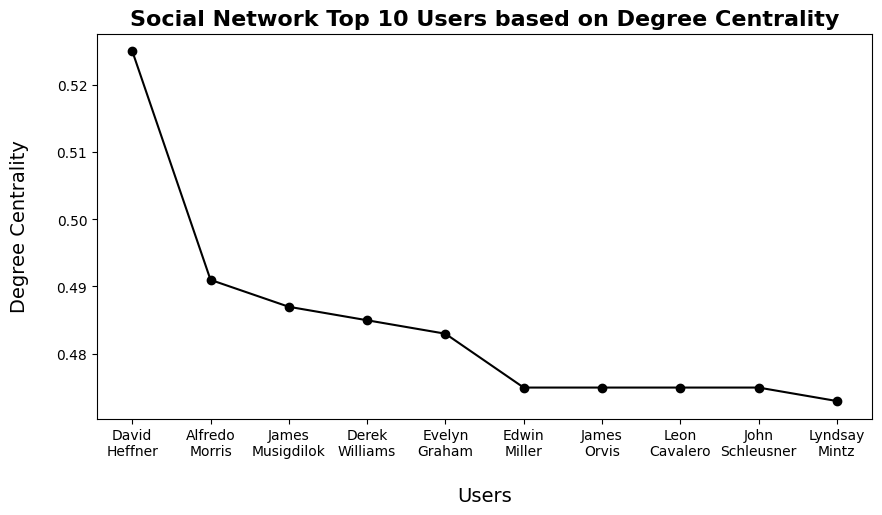

In [172]:
x=[name.replace(" ", '\n') for name in x]
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(x, y, marker='o', color='#000000')
plt.xticks(x)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

#setting labels
ax.set_xlabel('\nUsers', fontsize=14)
ax.set_ylabel('Degree Centrality\n', fontsize=14)
ax.set_title('Social Network Top 10 Users based on Degree Centrality', fontweight='bold', fontsize=16)



## Visualising Eigenvector Centrality

In [173]:
x=[]
y=[]
for degrees in eigen_list:
    x.append(degrees[0])
    y.append(degrees[1])

Text(0.5, 1.0, 'Social Network Top 10 Users based on Eigenvector Centrality')

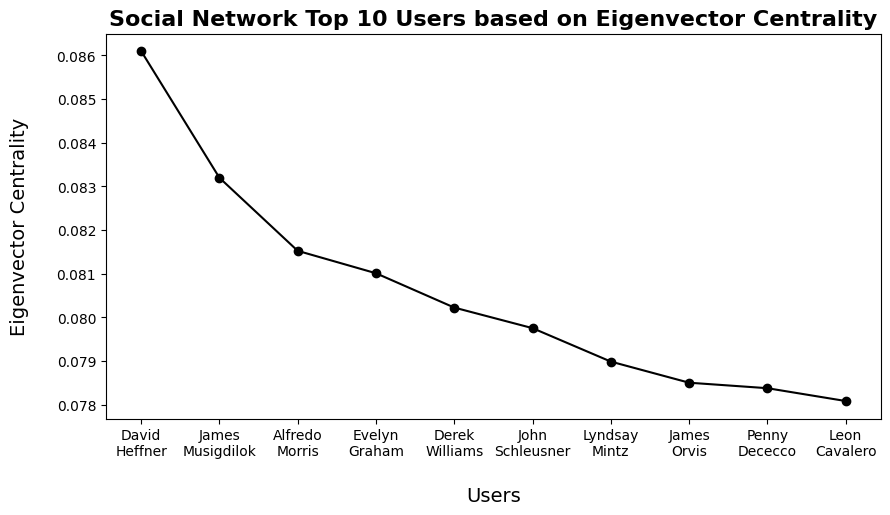

In [174]:
x=[name.replace(" ", '\n') for name in x]
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(x, y, marker='o', color='#000000')
plt.xticks(x)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

#setting labels
ax.set_xlabel('\nUsers', fontsize=14)
ax.set_ylabel('Eigenvector Centrality\n', fontsize=14)
ax.set_title('Social Network Top 10 Users based on Eigenvector Centrality', fontweight='bold', fontsize=16)



## Visualising Closeness

In [175]:
x=[]
y=[]
for degrees in close_list:
    x.append(degrees[0])
    y.append(degrees[1])

Text(0.5, 1.0, 'Social Network Top 10 Users based on Closeness Centrality')

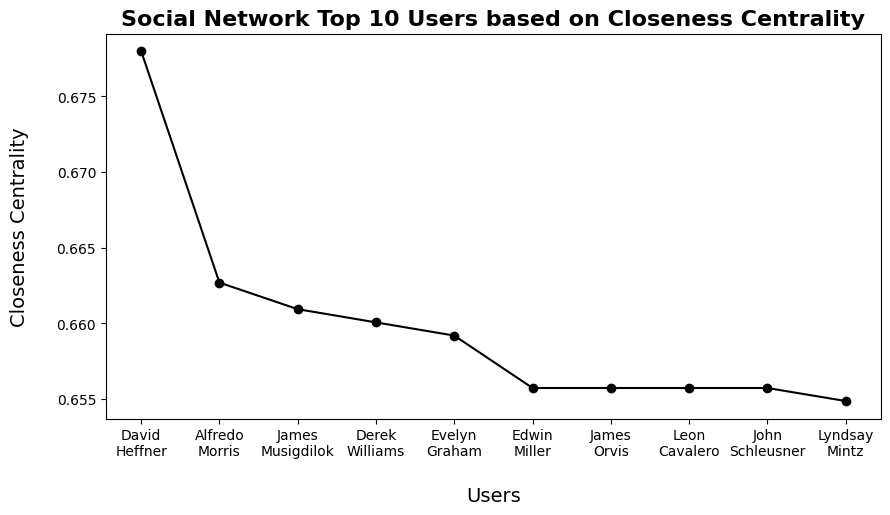

In [176]:
x=[name.replace(" ", '\n') for name in x]
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(x, y, marker='o', color='#000000')
plt.xticks(x)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

#setting labels
ax.set_xlabel('\nUsers', fontsize=14)
ax.set_ylabel('Closeness Centrality\n', fontsize=14)
ax.set_title('Social Network Top 10 Users based on Closeness Centrality', fontweight='bold', fontsize=16)



## Visualising Betweenness

In [177]:
x=[]
y=[]
for degrees in between_list:
    x.append(degrees[0])
    y.append(degrees[1])

Text(0.5, 1.0, 'Social Network Top 10 Users based on Betweenness Centrality')

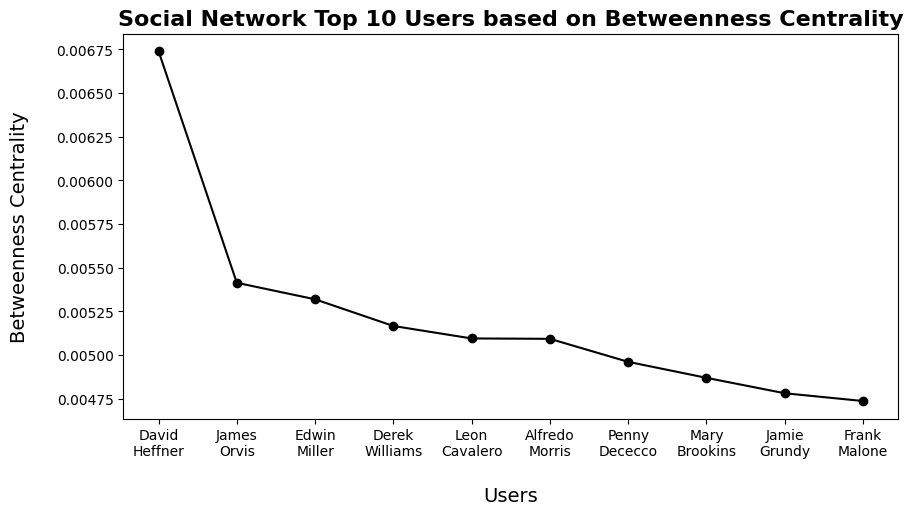

In [178]:
x=[name.replace(" ", '\n') for name in x]
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(x, y, marker='o', color='#000000')
plt.xticks(x)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

#setting labels
ax.set_xlabel('\nUsers', fontsize=14)
ax.set_ylabel('Betweenness Centrality\n', fontsize=14)
ax.set_title('Social Network Top 10 Users based on Betweenness Centrality', fontweight='bold', fontsize=16)



In [179]:

ranking_table= pd.DataFrame.from_dict({'Centrality': centrank, 'Eigenvector': eigenrank, 'Closeness': closerank, 'Betweenness': betweenrank} )
ranking_table

,Centrality,Eigenvector,Closeness,Betweenness
0,David Heffner 82651,David Heffner 82651,David Heffner 82651,David Heffner 82651
1,Alfredo Morris 92249,James Musigdilok 88694,Alfredo Morris 92249,James Orvis 93744
2,James Musigdilok 88694,Alfredo Morris 92249,James Musigdilok 88694,Edwin Miller 48259
3,Derek Williams 2807,Evelyn Graham 7092,Derek Williams 2807,Derek Williams 2807
4,Evelyn Graham 7092,Derek Williams 2807,Evelyn Graham 7092,Leon Cavalero 34364
5,Edwin Miller 48259,John Schleusner 49601,Edwin Miller 48259,Alfredo Morris 92249
6,James Orvis 93744,Lyndsay Mintz 39193,James Orvis 93744,Penny Dececco 98566
7,Leon Cavalero 34364,James Orvis 93744,Leon Cavalero 34364,Mary Brookins 30755
8,John Schleusner 49601,Penny Dececco 98566,John Schleusner 49601,Jamie Grundy 89143
9,Lyndsay Mintz 39193,Leon Cavalero 34364,Lyndsay Mintz 39193,Frank Malone 31210


In [180]:
for x in ranking_table.columns:
    ranking_table[x]=ranking_table[x].sort_values(ignore_index=True)
ranking_table

,Centrality,Eigenvector,Closeness,Betweenness
0,Alfredo Morris 92249,Alfredo Morris 92249,Alfredo Morris 92249,Alfredo Morris 92249
1,David Heffner 82651,David Heffner 82651,David Heffner 82651,David Heffner 82651
2,Derek Williams 2807,Derek Williams 2807,Derek Williams 2807,Derek Williams 2807
3,Edwin Miller 48259,Evelyn Graham 7092,Edwin Miller 48259,Edwin Miller 48259
4,Evelyn Graham 7092,James Musigdilok 88694,Evelyn Graham 7092,Frank Malone 31210
5,James Musigdilok 88694,James Orvis 93744,James Musigdilok 88694,James Orvis 93744
6,James Orvis 93744,John Schleusner 49601,James Orvis 93744,Jamie Grundy 89143
7,John Schleusner 49601,Leon Cavalero 34364,John Schleusner 49601,Leon Cavalero 34364
8,Leon Cavalero 34364,Lyndsay Mintz 39193,Leon Cavalero 34364,Mary Brookins 30755
9,Lyndsay Mintz 39193,Penny Dececco 98566,Lyndsay Mintz 39193,Penny Dececco 98566


Based on the dataframe, it reveals that David Heffner 82651, and Alfredo Morris 92249 are the top frequently mentioned users in the centrality measure rankings. 
However, the top users based on the centrality measures are as follows:
Degree Centrality: David Heffner 82651
Eigenvector Centrality: David Heffner 82651
Closeness Centrality: David Heffner 82651
Betweenness Centrality: David Heffner 82651


In [188]:
#subgraph for David Heffner
david_graph=nx.ego_graph(g, '82651', radius=1, center=True, undirected=False, distance=None)
print('Nodes: ',len(david_graph.nodes()))

Nodes:  263


# Network Graph Visualisation 

To best visualise the interconnectedness between the top users, the graph will focus on user David Heffner 82651


In [189]:
nx.write_graphml(david_graph,"SocialNetworkGraph.graphml", prettyprint=True, named_key_ids= True)

# Data Analysis + Insights

![image](GRAPH3.svg)

Node color intensity and size represent degree centrality and edge colors denote interests. Due to graph complexity and increased clarity, interests (edge attributes) are filtered down to these top categories:
![image](keylegend.png)


David Heffner, Norman Mauldin, and Inger Rice are revealed to have the highest degree centrality in this network.